# Exploratory Data Analysis


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

book_tags = pd.read_csv('data/book_tags.csv')
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
tags = pd.read_csv('data/tags.csv')
to_read = pd.read_csv('data/to_read.csv')

## Books

In [2]:
books.head(5)
books.shape
books.info()
books.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
id                           10000 non-null int64
book_id                      10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [3]:
# Number of unique authors in the dataset
len(books['authors'].unique())
# There are 4664 unique authors in the dataset

4664

# Ratings

In [4]:
ratings.shape
ratings.info()
ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
book_id    981756 non-null int64
user_id    981756 non-null int64
rating     981756 non-null int64
dtypes: int64(3)
memory usage: 22.5 MB


,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


# Distribution of Ratings

Text(0.5, 1.0, 'Distribution of Ratings')

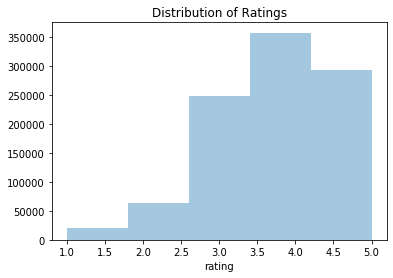

In [5]:
sns.distplot(ratings['rating'], bins=5, kde=False, rug=False).set_title('Distribution of Ratings')

# Distribution of Ratings per each book

Text(0.5, 1.0, 'Distribution of Ratings for each book')

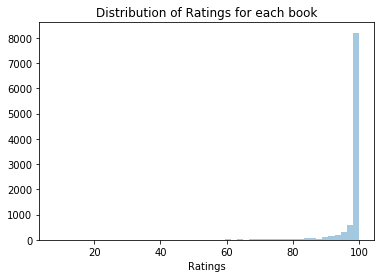

In [12]:
rat = ratings.drop('user_id', 1)
ratings_book = rat.groupby(['book_id']).count()
ratings_book.describe()
sns.distplot(ratings_book['rating'], kde=False, rug=False, axlabel='Ratings').set_title('Distribution of Ratings for each book')

# Distribution of mean book ratings for each book

Text(0.5, 1.0, 'Distribution of Mean Ratings for each book')

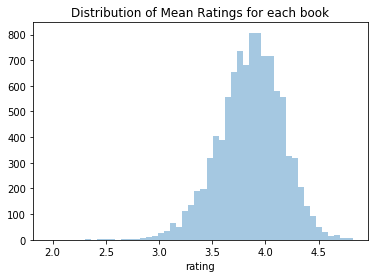

In [7]:
mean_ratings_book = rat.groupby(['book_id']).mean()
mean_ratings_book.describe()
sns.distplot(mean_ratings_book['rating'], kde=False, rug=False).set_title('Distribution of Mean Ratings for each book')

# Number of Ratings per user

Text(0.5, 1.0, 'Distribution of Ratings per each user')

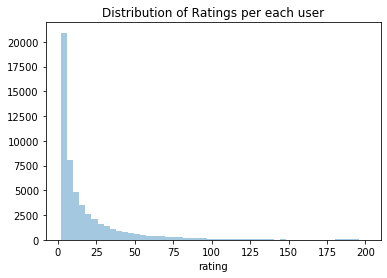

In [8]:
rat2 = ratings.drop('book_id', 1)
ratings_user = rat2.groupby(['user_id']).count()
ratings_user.describe()
sns.distplot(ratings_user['rating'], kde=False, rug=False).set_title('Distribution of Ratings per each user')

 # Distribution of mean user ratings

Text(0.5, 1.0, 'Distribution of Mean Ratings given by each user')

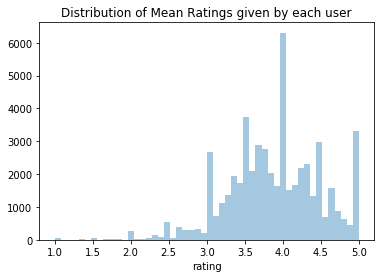

In [9]:
# 
mean_ratings_user = rat2.groupby(['user_id']).mean()
mean_ratings_user.describe()
sns.distplot(mean_ratings_user['rating'], kde=False, rug=False).set_title('Distribution of Mean Ratings given by each user')

# Correlation matrix for books.csv

In [11]:
books_corr= books.drop(columns=['work_id','id','book_id','best_book_id','best_book_id','isbn13','original_publication_year',"image_url","small_image_url"])
books_corr.corr()

,books_count,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
books_count,1.000000,-0.069888,0.324235,0.333664,0.198698,0.225763,0.334923,0.383699,0.349564,0.279559
average_rating,-0.069888,1.000000,0.044990,0.045042,0.007481,-0.077997,-0.115875,-0.065237,0.036108,0.115412
ratings_count,0.324235,0.044990,1.000000,0.995068,0.779635,0.723144,0.845949,0.935193,0.978869,0.964046
work_ratings_count,0.333664,0.045042,0.995068,1.000000,0.807009,0.718718,0.848581,0.941182,0.987764,0.966587
work_text_reviews_count,0.198698,0.007481,0.779635,0.807009,1.000000,0.572007,0.696880,0.762214,0.817826,0.764940
ratings_1,0.225763,-0.077997,0.723144,0.718718,0.572007,1.000000,0.926140,0.795364,0.672986,0.597231
ratings_2,0.334923,-0.115875,0.845949,0.848581,0.696880,0.926140,1.000000,0.949596,0.838298,0.705747
ratings_3,0.383699,-0.065237,0.935193,0.941182,0.762214,0.795364,0.949596,1.000000,0.952998,0.825550
ratings_4,0.349564,0.036108,0.978869,0.987764,0.817826,0.672986,0.838298,0.952998,1.000000,0.933785
ratings_5,0.279559,0.115412,0.964046,0.966587,0.764940,0.597231,0.705747,0.825550,0.933785,1.000000


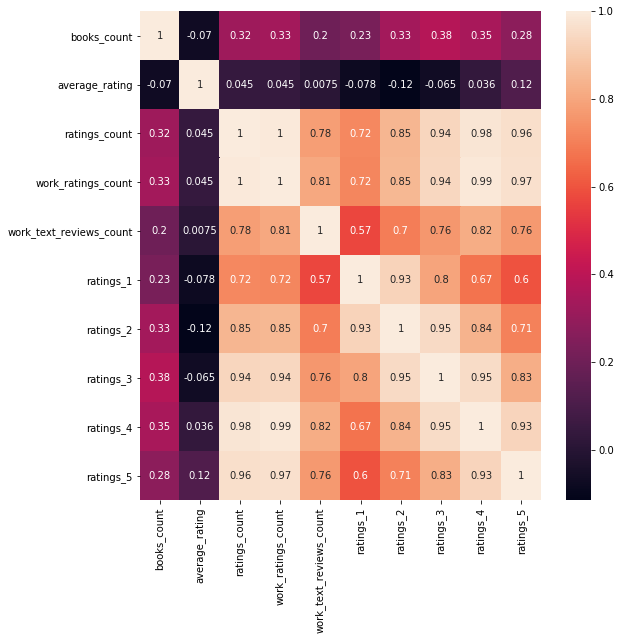

In [22]:
plt.subplots(figsize=(9,9))
sns.heatmap(books_corr.corr(), annot=True)
plt.show()